#### Objective
- The business objective is to predict the churn in the last (i.e. the ninth) month using the data (features) from the first three months.

#### Steps to be followed
- Data Inspection
- Data Cleaning
- Handling Missing Data
    - Analyse the missing values
    - Drop those with high missing
    - Check the columns that can be imputed
    - Filter HVC(find the 70th percentile value for avg_rech_amt_6_7)
    - Derive Churn(target variable) based on data month 9
- EDA
- Outliers Analysis
- Dummy Variable creation
- Train-Test Split
- Scaling
- Data Preparation
- Building Logistic Regression Model for interpretability(Modelling without PCA)
- Modelling with PCA
    - Logistic Regression
    - Decision Tree
    - Random Forest
- Evaluation
- Recoomendation based on above models

##### Telecom Data
- Good Month(6,7)
- Action Phase(8)
- Churned(9)

In [1]:
# Importing required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading data
telecom = pd.read_csv('telecom_churn_data.csv')

In [3]:
# Modifying the display settings
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
telecom.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [4]:
# Checking number of records and  and its colums
telecom.shape

(99999, 226)

In [5]:
# Inspecting the dataframe
telecom.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

In [6]:
# Analysing the stats
telecom.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

The circle_id has a single value that is 109 and the following fields has zero value in entire records, so dropping the fields as it will add any significance to model circle_id, loc_og_t2o_mou, std_og_t2o_mou, loc_ic_t2o_mou, std_og_t2c_mou_6, std_og_t2c_mou_7, std_og_t2c_mou_8, std_og_t2c_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9

# Data Cleaning

In [7]:
# Dropping the above mentioned columns which hold only single value
telecom.drop(['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_t2c_mou_9','std_ic_t2o_mou_6','std_ic_t2o_mou_7','std_ic_t2o_mou_8','std_ic_t2o_mou_9'], axis=1, inplace=True)

In [8]:
# Checking null values percentage in each columns
100*(telecom.isnull().sum(axis=0)/len(telecom))

mobile_number                0.000000
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_7                3.859039
roam_og_mou_8                5.378054
roam_og_mou_9                7.745077
loc_og_t2t_mou_6             3.937039
loc_og_t2t_m

In [9]:
# Droppoing all the date columns as it is not required for churn cases identification.
telecom.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9'], axis=True, inplace=True)

In [10]:
telecom.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,212.17,NaN,0.0,0.0,0.0,NaN,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.0,2.91,0.00,0.00,35.39

In [11]:
# Checking data in column "vol_3g_mb_6" corresponding to the null values present in other data recharge columns
telecom[telecom['total_rech_data_6'].isnull()& telecom['total_rech_data_7'].isnull()].vol_3g_mb_6.value_counts()

0.0    67854
Name: vol_3g_mb_6, dtype: int64

In [12]:
# Imputing null values with zero from above analysis
cols = telecom.columns
filled_columns = []
for column in cols:
    if telecom[column].isnull().sum()/len(telecom) > .7:
        filled_columns.append(column)
        telecom[column] = telecom[column].fillna(0)
print('Following columns has been filled', filled_columns)

Following columns has been filled ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_3g_9', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'arpu_2g_9', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'night_pck_user_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9']


In [13]:
# Checking null values percentage in each columns
100*(telecom.isnull().sum(axis=0)/len(telecom))

mobile_number         0.000000
arpu_6                0.000000
arpu_7                0.000000
arpu_8                0.000000
arpu_9                0.000000
onnet_mou_6           3.937039
onnet_mou_7           3.859039
onnet_mou_8           5.378054
onnet_mou_9           7.745077
offnet_mou_6          3.937039
offnet_mou_7          3.859039
offnet_mou_8          5.378054
offnet_mou_9          7.745077
roam_ic_mou_6         3.937039
roam_ic_mou_7         3.859039
roam_ic_mou_8         5.378054
roam_ic_mou_9         7.745077
roam_og_mou_6         3.937039
roam_og_mou_7         3.859039
roam_og_mou_8         5.378054
roam_og_mou_9         7.745077
loc_og_t2t_mou_6      3.937039
loc_og_t2t_mou_7      3.859039
loc_og_t2t_mou_8      5.378054
loc_og_t2t_mou_9      7.745077
loc_og_t2m_mou_6      3.937039
loc_og_t2m_mou_7      3.859039
loc_og_t2m_mou_8      5.378054
loc_og_t2m_mou_9      7.745077
loc_og_t2f_mou_6      3.937039
loc_og_t2f_mou_7      3.859039
loc_og_t2f_mou_8      5.378054
loc_og_t

# Deriving Features

In [14]:
# Calculating total data recharge amount
telecom['total_recharche_amout_6'] = telecom['total_rech_amt_6'] + (telecom['total_rech_data_6']* telecom['av_rech_amt_data_6'])
telecom['total_recharche_amout_7'] = telecom['total_rech_amt_7'] + (telecom['total_rech_data_7']* telecom['av_rech_amt_data_7'])

# Calculating average amount
telecom['avg_rech_amt_6_7'] = (telecom['total_recharche_amout_6'] + telecom['total_recharche_amout_7'])/2

In [15]:
# Checking null value in the field as it is used for filtering high value customers
telecom['avg_rech_amt_6_7'].isnull().any()

False

### Filter high-value customers(HVC)

In [16]:
telecom.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_recharche_amout_6,total_recharche_amout_7,avg_rech_amt_6_7
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,212.17,212.17,212.17,0.00,212.17,212.17,212.17,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,0.0,968,30.4,0.0,101.20,3.58,614.0,504.0,559.0
1,7001865778,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,23.88,74

In [17]:
# calculating percentile
telecom['avg_rech_amt_6_7'].quantile([.25,.50,.70,.90])

0.25     128.0
0.50     275.0
0.70     478.0
0.90    1028.0
Name: avg_rech_amt_6_7, dtype: float64

In [18]:
# creating dataset for high value customer based on 70th percintile data 
telecom_hvc = telecom[telecom['avg_rech_amt_6_7']>= 478.0]

In [19]:
telecom_hvc.shape

(30001, 205)

In [20]:
telecom_hvc.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_recharche_amout_6,total_recharche_amout_7,avg_rech_amt_6_7
0,7000842753,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,212.17,212.17,212.17,0.00,212.17,212.17,212.17,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1.0,1.0,1.0,0.0,968,30.40,0.00,101.20,3.58,614.0,504.0,559.0
7,7000701601,1069.180,1349.850,3171.480,500.000,57.84,54.68,52.29,NaN,453.43,567.16,325.91,NaN,16.23,33.49,31.64,NaN,23.74,12.59,3

In [21]:
# Finding the columns which has more zero( > 80 %) values
cols = telecom_hvc.columns
dropped_list = []
for i in cols:
    if (len(telecom_hvc[telecom_hvc[i]== 0.0])/len(telecom_hvc)) > .8:
        dropped_list.append(i)
dropped_list

['roam_ic_mou_7',
 'roam_og_mou_7',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2f_mou_9',
 'isd_og_mou_6',
 'isd_og_mou_7',
 'isd_og_mou_8',
 'isd_og_mou_9',
 'og_others_7',
 'og_others_8',
 'og_others_9',
 'spl_ic_mou_7',
 'spl_ic_mou_8',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_2g_9',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8',
 'monthly_3g_9',
 'sachet_3g_6',
 'sachet_3g_7',
 'sachet_3g_8',
 'sachet_3g_9',
 'sep_vbc_3g']

In [22]:
# Dropping the highly skewed columns(filled with zero)
telecom_hvc.drop(dropped_list, axis=1, inplace=True)

In [23]:
telecom_hvc.shape

(30001, 173)

## Imputing Missing values using KNN now

In [24]:
# Removing mobile number from the dataset before running KNN
mobile = pd.DataFrame({'mobile_number':telecom_hvc['mobile_number']},index=telecom_hvc.index)
telecom_hvc = telecom_hvc.drop(['mobile_number'], axis=1)

In [25]:
mobile.shape, telecom_hvc.shape

((30001, 1), (30001, 172))

In [26]:
# Importing library
from sklearn.impute import KNNImputer

In [27]:
# Instantiating KNNImputer
imputer =KNNImputer(n_neighbors=5)
telecom_knn = pd.DataFrame(imputer.fit_transform(telecom_hvc))

In [28]:
# Setting columns
telecom_knn.columns = telecom_hvc.columns

In [29]:
# Resetting index
mobile= mobile.reset_index(drop=True)
telecom_knn = telecom_knn.reset_index(drop=True)

In [30]:
# Merging mobile number with dataset
telecom_knn = pd.concat([mobile,telecom_knn], axis=1)

In [31]:
telecom_knn.shape

(30001, 173)

In [32]:
telecom_knn.head()

,mobile_number,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_recharche_amout_6,total_recharche_amout_7,avg_rech_amt_6_7
0,7000842753,197.385,214.816,213.803,21.100,1.764,8.50,0.00,4.074,23.72,42.084,0.00,24.010,17.852,0.00,7.054,15.176,0.00,17.948,1.658,1.958,0.00,2.702,8.652,16.818,0.00,2.970,0.00,3.688,0.00,0.016,0.0,0.0,0.00,0.000,10.314,22.466,0.00,5.690,0.00,3.092,0.00,0.000,0.00,10.718,0.00,4.446,0.00,19.186,0.00,4.446,0.0,0.0,0.00,0.348,0.0,0.00,0.00,0.00,0.00,36.794,17.214,0.16,18.230,27.81,21.026,4.13,13.270,1.446,1.904,1.15,0.94,66.054,40.148,5.44,32.444,3.238,3.198,0.00,0.624,19.842,6.79,0.00,3.358,0.00,0.00,0.00,0.066,23.082,9.99,0.00,4.050,0.00,0.00,5.44,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.028,0.212,0.00,0.0,4.0,3.0,2.0,6.0,362.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,252.0,252.0,252.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,212.17,212.17,212.17,0.00,212.17,212.17,212.17,0.00,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,968.0,30.40,0.00,101.20,614.0,504.0,559.0
1,7000701601,1069.180,1349.850,3171.480,500.000,57.840,54.68,52.29,54.808,453.43,567.160,325.91,239.656,16.230,31.64,65.090,23.740,38.06,75.320,51.390,31.380,40.28,25.802,308.630,447.380,162.28,105.478,62.13,55.140,53.23,12.240,0.0,0.0,0.00,1.162,422.160,533.910,255.79,143.528,4.30,23.290,12.01,3.354,49.89,31.760,49.14,50.360,60.86,75.140,77.84,53.788,4.5,0.0,6.50,2.584,0.0,487.53,609.24,350.16,0.00,58.140,32.260,27.31,23.292,217.56,221.490,121.19,115.848,152.160,101.460,39.53,8.06,427.880,355.230,1

# Deriving Churn

In [33]:
# Deriving the churn customers
telecom_knn['churn'] = telecom_knn[['total_og_mou_9','total_ic_mou_9','vol_2g_mb_9','vol_3g_mb_9']].apply(lambda x: 1 if (x.total_og_mou_9==0.0 and x.total_ic_mou_9==0.0 and x.vol_2g_mb_9==0.0 and x.vol_3g_mb_9==0.0) else 0, axis=1)

In [34]:
# Calculating Churn using month 9 data
telecom_knn['churn'].value_counts(normalize=False)

0    27560
1     2441
Name: churn, dtype: int64

Data is imbalanced

In [35]:
# Listing columns corresponding to churn phase
telecom.columns[telecom.columns.str.contains('_9')]

Index(['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9',
       'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9',
       'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9',
       'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9',
       'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9',
       'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9',
       'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9',
       'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9',
       'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9',
       'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9',
       'last_day_rch_amt_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9',
       'sachet_3g_9', 'fb_user_9'],
      dtype='object')

In [36]:
# Dropping the columns belonging to churn months
telecom_knn.drop(telecom_knn.columns[telecom_knn.columns.str.contains('_9')], axis=1, inplace=True)

# EDA

# Univariate analysis

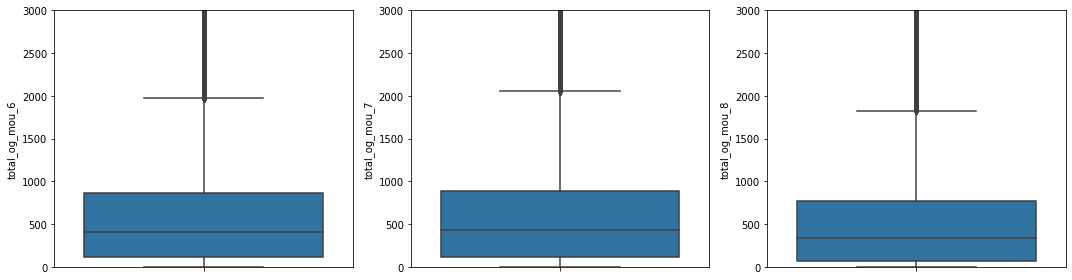

In [37]:
# Analysing Total Outgoing calls Minutes of Usage
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.boxplot( y=telecom_knn['total_og_mou_6'])
plt.ylim(0,3000) #Setting the Y-scale to value 3000 to visualize better as it has more outliers
plt.subplot(1,3,2)
sns.boxplot( y=telecom_knn['total_og_mou_7'])
plt.ylim(0,3000)
plt.subplot(1,3,3)
sns.boxplot( y=telecom_knn['total_og_mou_8'])
plt.ylim(0,3000)
plt.tight_layout()
plt.show()

From the graph above, Total Outgoing calls Minutes usage is bit less or almost same on Good Phase and Action phase

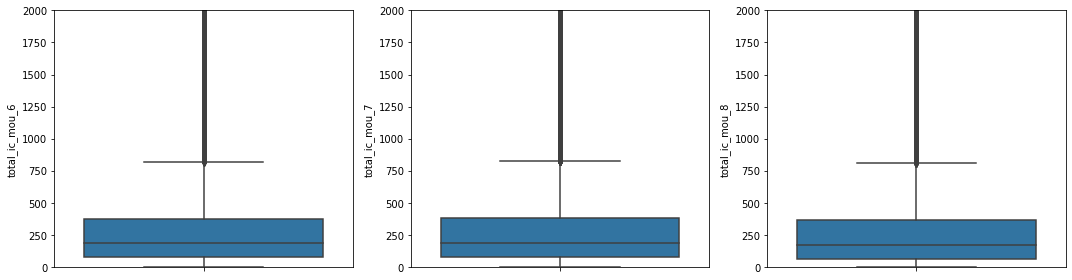

In [38]:
# Analysing Total Outgoing calls Minutes of Usage
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.boxplot( y=telecom_knn['total_ic_mou_6'])
plt.ylim(0,2000) #Setting the Y-scale to value 2000 to visualize better as it has more outliers
plt.subplot(1,3,2)
sns.boxplot( y=telecom_knn['total_ic_mou_7'])
plt.ylim(0,2000)
plt.subplot(1,3,3)
sns.boxplot( y=telecom_knn['total_ic_mou_8'])
plt.ylim(0,2000)
plt.tight_layout()
plt.show()

From the graph above, Incoming calls Minutes usage is bit less or almost same on Good Phase and Action phase

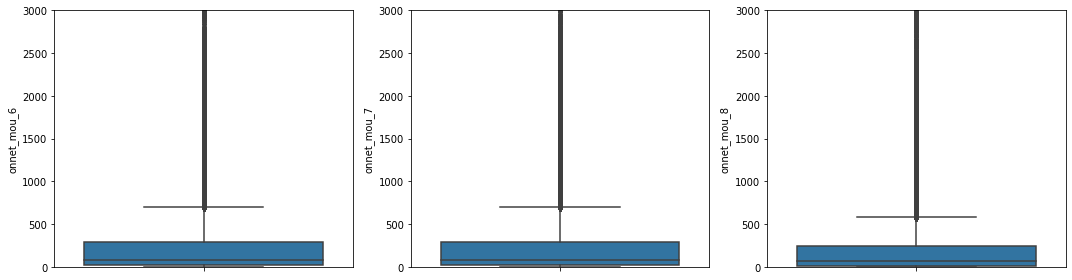

In [39]:
# Analysing the features onnet_mou_6, onnet_mou_7, onnet_mou_8
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.boxplot(y=telecom_knn['onnet_mou_6'])
plt.ylim(0,3000) #Setting the Y-scale to value 3000 to visualize better as it has more outliers
plt.subplot(1,3,2)
sns.boxplot(y=telecom_knn['onnet_mou_7'])
plt.ylim(0,3000) #Setting the Y-scale to value 3000 to visualize better as it has more outliers
plt.subplot(1,3,3)
sns.boxplot(y=telecom_knn['onnet_mou_8'])
plt.ylim(0,3000) #Setting the Y-scale to value 3000 to visualize better as it has more outliers
plt.tight_layout()
plt.show()

From the graph above, Onnet Minutes usage is bit less or almost same on Good Phase and Action phase

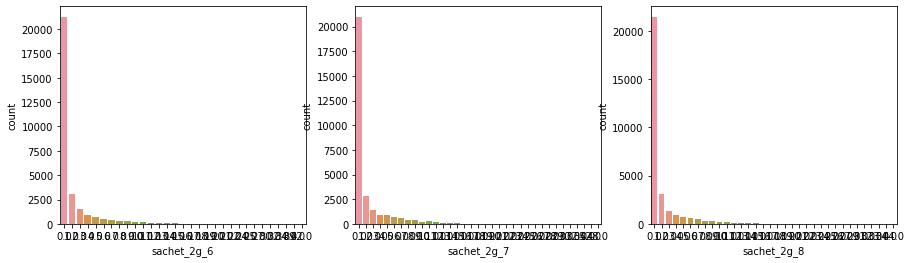

In [40]:
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.countplot(telecom_knn['sachet_2g_6'])
plt.subplot(1,3,2)
sns.countplot(telecom_knn['sachet_2g_7'])
plt.subplot(1,3,3)
sns.countplot(telecom_knn['sachet_2g_8'])
plt.show()

Sachet_2g pack "1.0" looks popular. Here "0.0" means no pack.

## Bi-Variate Analysis

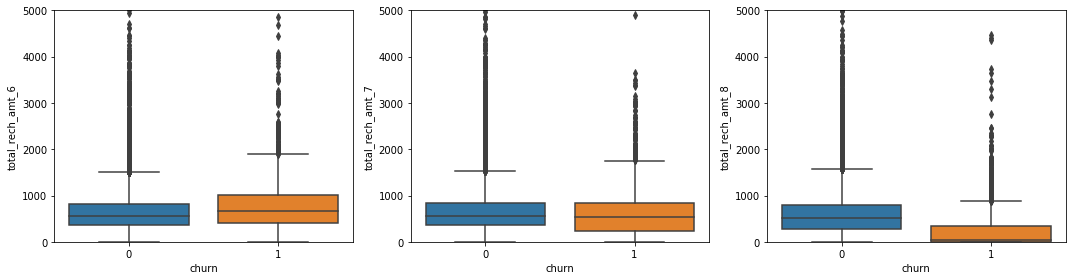

In [41]:
# Analysing Total Recharge amount against Output variable Churn
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.boxplot(x=telecom_knn['churn'], y=telecom_knn['total_rech_amt_6'])
plt.ylim(0,5000) #Setting the Y-scale to value 5000 to visualize better as it has more outliers
plt.subplot(1,3,2)
sns.boxplot(x=telecom_knn['churn'] ,y=telecom_knn['total_rech_amt_7'])
plt.ylim(0,5000)
plt.subplot(1,3,3)
sns.boxplot(x=telecom_knn['churn'], y=telecom_knn['total_rech_amt_8'])
plt.ylim(0,5000)
plt.tight_layout()
plt.show()

From the above graph, we can see For Churn Customers, Total Recharge amount for 8th Month(i.e Action Phase) is less compared to 6th and 7thmonth(i.e good phase)

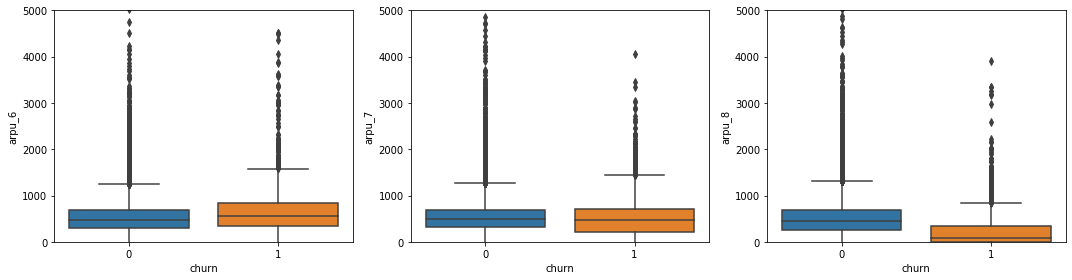

In [42]:
# Analysing Average Revenue per User against Output variable Churn
plt.figure(figsize=(15,4))
plt.subplot(1,3,1)
sns.boxplot(x=telecom_knn['churn'], y=telecom_knn['arpu_6'])
plt.ylim(0,5000)
plt.subplot(1,3,2)
sns.boxplot(x=telecom_knn['churn'] ,y=telecom_knn['arpu_7'])
plt.ylim(0,5000)
plt.subplot(1,3,3)
sns.boxplot(x=telecom_knn['churn'], y=telecom_knn['arpu_8'])
plt.ylim(0,5000)
plt.tight_layout()
plt.show()

From the above graph, we can see For Churn Customers, Average Revenue per user for 8th Month(i.e Action Phase) is less compared to 6th and 7thmonth(i.e good phase)

# Outlier Analysis

In [43]:
telecom_knn.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_recharche_amout_6,total_recharche_amout_7,avg_rech_amt_6_7,churn
count,3.000100e+04,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,7.001206e+09,558.490824,560.782203,508.597957,261.573774,268.234975,235.093287,375.125994,379.135505,337.065901,16.312944,12.802239,26.904700,20.219217,84.694626,85.870233,78.511886,163.833600,163.561834,152.776319,6.381547,6.450551,5.938572,1.594901,1.904416,1.740538,254.918076,255.891053,237.234786,166.339183,174.384944,148.858148,179.92550

In [44]:
# Creating variable for categorical and numerical features
vars_cat = ['sachet_2g_6','sachet_2g_7','sachet_2g_8']
vars_num = telecom_knn.columns.drop(vars_cat).drop('churn')

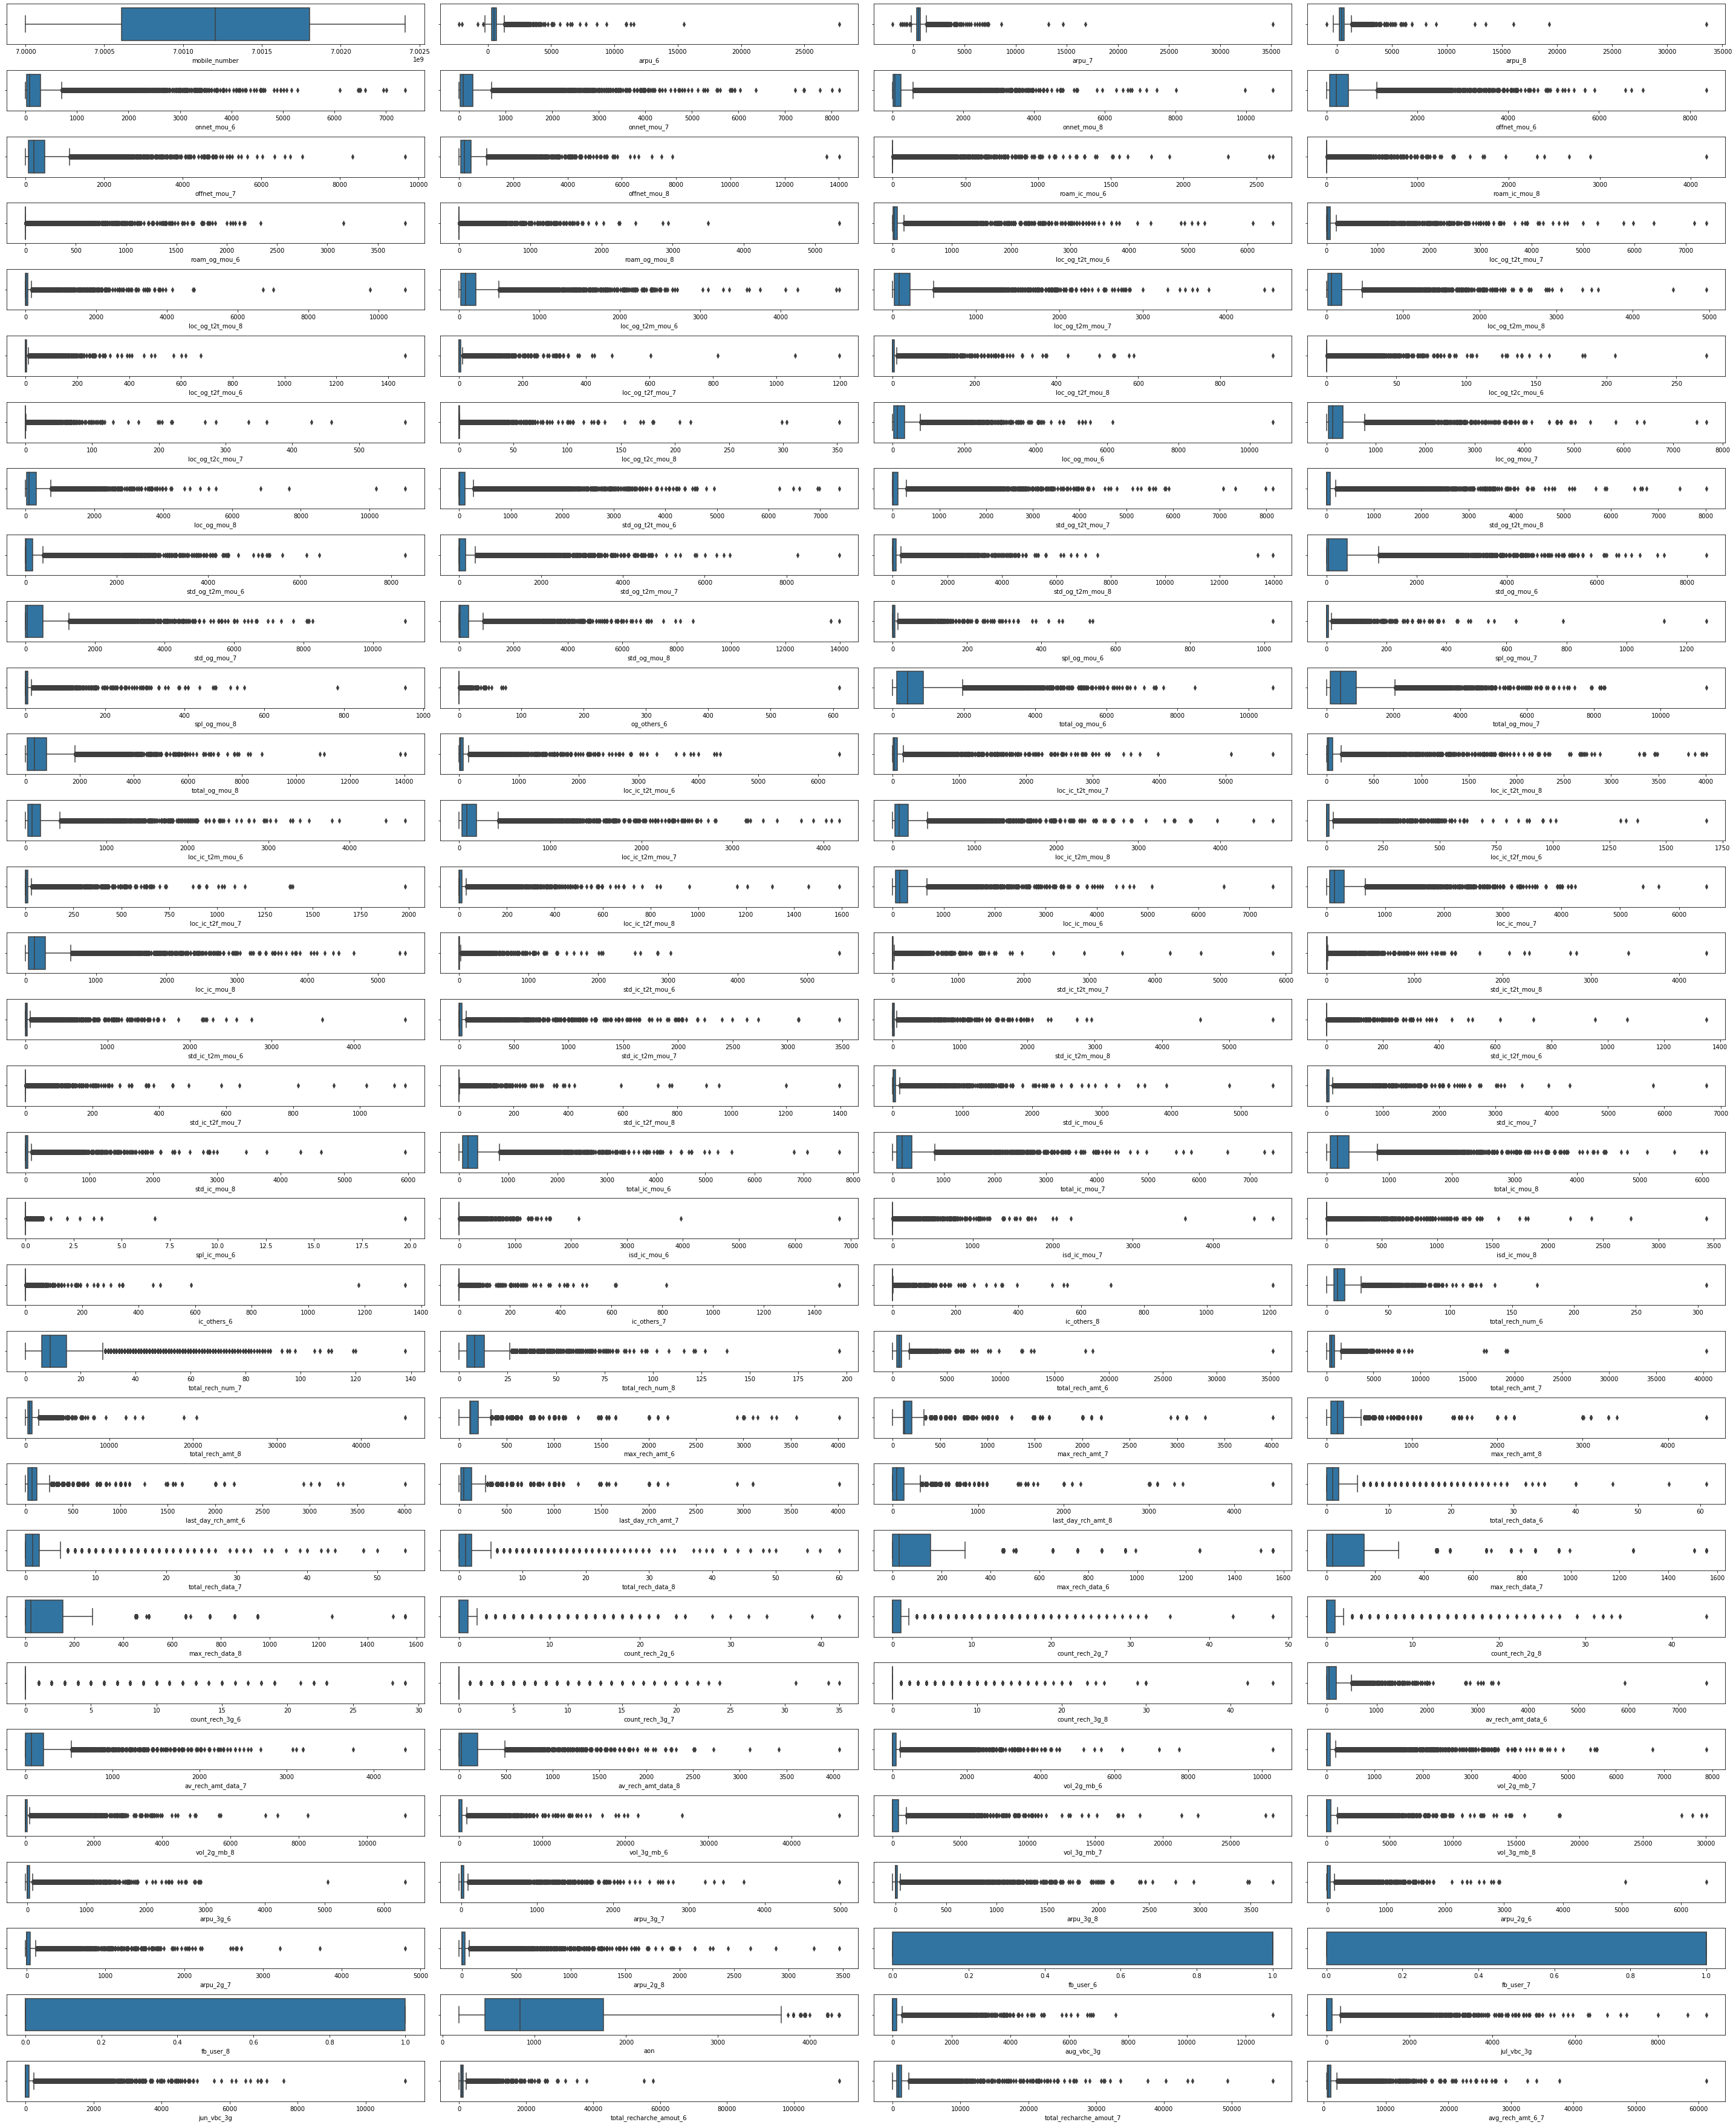

In [45]:
# Plotting features for outlier analysis
rows = len(vars_num)/4 + 1
plt.figure(figsize=(40,50))
for i,j in enumerate(vars_num):
    plt.subplot(rows,4,i+1)
    sns.boxplot(telecom_knn[j])
plt.tight_layout()
plt.show()

Here almost all the fields have outliers, capping and binning the same would result in loosing the actual data.There may be customers who have high usage. So not performing any outlier treatment.

# Data Preparation

In [46]:
# Dropping some variable based high correlation
# Create correlation matrix
corr_matrix = telecom_knn[vars_num].corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.85)]
print('Dropped Columns are ', to_drop)
# Dropping highly correlated columns(> 85)
telecom_hvc.drop(to_drop, axis=1, inplace = True)

Dropped Columns are  ['std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'avg_rech_amt_6_7']


# Dummification of categorical variables

In [47]:
# Checking values in the feature
telecom_knn['sachet_2g_6'].value_counts()

0.0     21256
1.0      3100
2.0      1505
3.0       940
4.0       742
5.0       516
6.0       444
7.0       339
8.0       291
9.0       229
10.0      194
11.0      119
12.0      111
13.0       53
14.0       44
15.0       28
17.0       18
16.0       16
19.0       13
18.0       13
22.0        7
20.0        6
21.0        5
25.0        3
24.0        3
32.0        1
34.0        1
39.0        1
30.0        1
27.0        1
42.0        1
Name: sachet_2g_6, dtype: int64

In [48]:
#Combining the smaller categories into '99.0' category for sachet plans
cols = ['sachet_2g_6','sachet_2g_7','sachet_2g_8']
for i in cols:
    cnt = telecom_knn[i].value_counts(normalize=True)
    small_categories = cnt[cnt < 0.03].index # if any category has less than 10% of data share, then classify it as small_categories
    telecom_knn[i] = telecom_knn[i].replace(small_categories, 99.0) # replace/combine all small categories into New 99.0 category

In [49]:
# dummification
for i in vars_cat:
    j = 'df_'+i
    j = pd.get_dummies(telecom_knn[i],prefix=i, drop_first=True)
    telecom_knn = pd.concat([telecom_knn,j], axis=1)
    telecom_knn.drop(i, axis=1, inplace=True)
telecom_knn.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_recharche_amout_6,total_recharche_amout_7,avg_rech_amt_6_7,churn,sachet_2g_6_1.0,sachet_2g_6_2.0,sachet_2g_6_3.0,sachet_2g_6_99.0,sachet_2g_7_1.0,sachet_2g_7_2.0,sachet_2g_7_99.0,sachet_2g_8_1.0,sachet_2g_8_2.0,sachet_2g_8_99.0
0,7000842753,197.385,214.816,213.803,1.764,8.50,0.00,23.72,42.084,0.00,17.852,0.00,15.176,0.00,1.658,1.958,0.00,8.652,16.818,0.00,0.00,3.688,0.00,0.0,0.0,0.00,10.314,22.466,0.00,0.00,3.092,0.00,0.00,10.718,0.00,0.00,19.186,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,36.794,17.214,0.16,27.81,21.026,4.13,1.446,1.904,1.15,66.054,40.148,5.44,3.238,3.198,0.00,19.842,6.79,0.00,0.00,0.00,0.00,23.082,9.99,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.028,0.212,0.00,4.0,3.0,2.0,362.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,1.0,1.0,1.0,252.0,252.0,252.0,0.0,0.0,0.0,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,1.0,1.0,1.0,968.0,30.40,0.00,101.20,614.0,504.0,559.0,1,0,0,0,0,0,0,0,0,0,0
1,7000701601,1069.180,1349.850,3171.480,57.840,54.68,52.29,453.43,567.160,325.91,16.230,31.64,23.740,38.06,51.390,31.380,40.28,308.630,447.380,162.28,62.13,55.140,53.23,0.0,0.0,0.00,422.160,533.910,255.79,4.30,23.290,12.01,49.89,31.760,49.14,60.86,75.140,77.84,4.5,0.0,6.50,0.0,487.53,609.24,350.16,58.140,32.260,27.31,217.56,221.490,121.19,152.160,101.460,39.53,427.880,355.230,188.04,36.890,11.830,30.39,91.440,126.99,141.33,52.19,34.24,22.21,180.540,173.08,193.94,626.46,558.04,428.74,0.21,2.06,14.53,31.59,15.740,15.190,15.14,5.0,5.0,7.0,1580.0,790.0,3638.0,1580.0,790.0,1580.0,0.0,0.0,779.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,802.0,57.74,19.38,18.74,1580.0,790.0,1185.0,1,0,0,0,0,0,0,0,0,0,0
2,7001524846,378.721,492.223,137.362,413.690,351.03,35.08,94.66,80.630,136.48,0.000,0.00,0.000,0.00,297.130,217.590,12.49,80.960,70.580,50.54,0.00,0.000,0.00,0.0,0.0,7.15,378.090,288.180,63.04,116.56,133.430,22.58,13.69,10.040,75.69,130.26,143.480,98.28,0.0,0.0,10.23,0.0,508.36,431.66,171.56,23.840,9.840,0.31,57.58,13.980,15.48,0.000,0.000,0.00,81.430,23.830,15.79,0.000,0.580,0.10,22.430,4.08,0.65,0.00,0

In [50]:
telecom_knn.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_recharche_amout_6,total_recharche_amout_7,avg_rech_amt_6_7,churn,sachet_2g_6_1.0,sachet_2g_6_2.0,sachet_2g_6_3.0,sachet_2g_6_99.0,sachet_2g_7_1.0,sachet_2g_7_2.0,sachet_2g_7_99.0,sachet_2g_8_1.0,sachet_2g_8_2.0,sachet_2g_8_99.0
count,3.000100e+04,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,7.001206e+09,558.490824,560.782203,508.597957,261.573774,268.234975,235.093287,375.125994,379.135505,337.065901,16.312944,12.8

# Train Test Split

In [51]:
# Dependent and Independent variable
y = telecom_knn['churn']
x = telecom_knn.drop(['churn'], axis=1)

In [52]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=.7, test_size=.3, random_state = 2)

In [53]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((21000, 138), (9001, 138), (21000,), (9001,))

In [54]:
x_train.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_recharche_amout_6,total_recharche_amout_7,avg_rech_amt_6_7,sachet_2g_6_1.0,sachet_2g_6_2.0,sachet_2g_6_3.0,sachet_2g_6_99.0,sachet_2g_7_1.0,sachet_2g_7_2.0,sachet_2g_7_99.0,sachet_2g_8_1.0,sachet_2g_8_2.0,sachet_2g_8_99.0
10004,7001086439,1168.764,951.610,845.525,79.68,53.43,36.51,901.48,702.59,678.68,0.00,0.00,0.00,0.00,79.68,49.43,36.51,612.78,600.98,553.89,0.00,0.68,8.09,0.0,0.0,0.00,692.46,651.09,598.51,0.00,3.99,0.00,288.69,90.38,116.68,288.69,94.38,116.68,0.00,12.68,1.01,0.00,981.16,758.16,716.21,37.86,43.64,16.79,252.54,356.38,271.23,2.98,5.79,6.48,293.39,405.83,294.51,0.00,4.58,0.73,6.71,7.83,1.29,0.00,0.0,0.0,6.71,12.41,2.03,300.21,421.03,296.54,0.00,0.00,2.78,0.0,0.10,0.00,0.00,13.0,11.0,6.0,1408.0,1208.0,952.0,198.0,198.0,252.0,110.0,130.0,150.0,1.0,1.0,1.0,198.0,198.0,252.0,1.0,1.0,0.0,0.0,0.0,1.0,198.0,198.0,252.0,724.52,179.01,267.92,0.0,0.0,0.0,0.0,0.0,212.17,0.0,72.95,212.17,1.0,1.0,1.0,3334.0,0.0,0.0,0.0,1606.0,1406.0,1506.0,0,0,0,0,0,0,0,0,0,0
5357,7000708191,1311.944,880.005,336.483,2993.66,1715.89,611.69,148.69,122.33,75.08,0.00,11.84,0.00,13.11,50.78,23.93,27.36,32.36,24.88,38.11,0.00,0.00,0.00,0.0,0.0,0.00,83.14,48.81,65.48,2942.88,1660.29,577.93,104.44,84.96,31.18,3047.33,1745.26,609.11,13.43,4.03,2.13,2.23,3146.14,1798.11,676.73,56.61,15.61,7.64,116.16,62.98,51.59,1.09,0.00,0.00,173.88,78.59,59.24,6.81,5.83,0.05,10.29,0.48,2.53,0.00,0.0,0.0,17.11,6.31,2.58,190.99,84.91,61.83,0.00,0.00,0.00,0.0,0.00,0.00,0.00,22.0,12.0,5.0,1591.0,1030.0,445.0,110.0,110.0,149.0,110.0,30.0,149.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,1165.0,0.0,0.0,0.0,1591.0,1030.0,1310.5,0,0,0,0,0,0,0,0,0,0
4020,7000893882,868.171,800.280,639.484,56.76,34.31,42.94,914.21,1189.79,788.23,3.35,0.00,12.98,0.00,55.56,33.34,42.94,403.51,444.56,390.08,20.41,9.61,1.59,0.0,0.0,5.63,479.49,487.53,434.63,1.19,0.96,0.00,475.61,731.11,390.91,476.81,732.08,390.91,0.00,4.50,5.63,0.00,957.99,1224.11,831.18,47.28,43.18,16.33,316.16,298.91,312.33,19.68,6.13,18.83,383.13,348.23,347.49,1.39,0.00,0.00,6.49,5.68,0.03,0.00,0.0,0.0,7.89,5.68,0.03,392.21,367.94,356.53,0.36,0.00,0.00,0

In [55]:
# Selecting the columns to be scaled(Excluding the dummified columns)
x_train.columns[1:128]

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'fb_user_6', 'fb_user_7', 'fb_user_8', 'aon', 'aug_vbc_3g',
       'jul_vbc_3g', 'jun_vbc_3g', 'total_recharche_amout_6',
       'total_recharche_amout_7', 'avg_rech_amt_6_7'],
      dtype='object', length=127)

# ReScaling

In [56]:
# Scaling
vars_tobe_scaled = telecom_knn.columns[1:128]
scaler = StandardScaler()
x_train[vars_tobe_scaled] = scaler.fit_transform(x_train[vars_tobe_scaled])

In [57]:
# Tranforming the test data 
x_test[vars_tobe_scaled] = scaler.transform(x_test[vars_tobe_scaled])

In [58]:
x_train.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_recharche_amout_6,total_recharche_amout_7,avg_rech_amt_6_7,sachet_2g_6_1.0,sachet_2g_6_2.0,sachet_2g_6_3.0,sachet_2g_6_99.0,sachet_2g_7_1.0,sachet_2g_7_2.0,sachet_2g_7_99.0,sachet_2g_8_1.0,sachet_2g_8_2.0,sachet_2g_8_99.0
10004,7001086439,1.293294,0.765999,0.637665,-0.397873,-0.451468,-0.435358,1.096387,0.652336,0.718435,-0.218810,-0.185215,-0.229000,-0.192984,-0.016430,-0.147844,-0.179257,1.806044,1.823196,1.710083,-0.278966,-0.265427,0.114566,-0.251912,-0.220856,-0.242132,1.168970,1.065177,0.986246,-0.416059,-0.411579,-0.380315,0.267206,-0.225481,-0.099335,-0.099167,-0.423632,-0.316490,-0.327748,0.247082,-0.275890,-0.145302,0.539408,0.184608,0.238933,-0.168306,-0.138949,-0.296407,0.475430,0.948058,0.575950,-0.272639,-0.218351,-0.189666,0.201792,0.557176,0.233226,-0.184711,-0.126329,-0.177321,-0.246969,-0.223953,-0.274831,-0.146667,-0.137892,-0.129926,-0.300067,-0.248267,-0.315343,0.032190,0.339239,0.051862,-0.402534,-0.134437,-0.113134,-0.164205,-0.084019,-0.108041,-0.106227,0.123654,-0.072163,-0.427997,1.307242,0.900193,0.567583,0.152056,0.135245,0.504029,0.055296,0.197952,0.374394,-0.231354,-0.272862,-0.206434,1.049723,1.009021,1.598025,-0.090010,-0.141163,-0.475277,-0.362949,-0.356672,0.477204,0.349933,0.272901,0.658110,1.765167,0.154124,0.502558,-0.392627,-0.411637,-0.391256,-0.386182,-0.374169,0.872542,-0.410411,0.040669,1.001098,0.968588,0.956744,1.048509,2.233830,-0.397356,-0.401409,-0.378227,0.375342,0.130068,0.280520,0,0,0,0,0,0,0,0,0,0
5357,7000708191,1.597396,0.624800,-0.333914,5.984739,3.066734,0.831776,-0.472586,-0.515517,-0.550403,-0.218810,-0.014589,-0.229000,-0.070770,-0.145169,-0.254625,-0.218764,-0.529865,-0.576695,-0.492819,-0.278966,-0.296742,-0.313263,-0.251912,-0.220856,-0.242132,-0.454815,-0.552471,-0.469765,6.903385,3.597684,1.103198,-0.185088,-0.238052,-0.311700,4.444777,2.175616,0.504905,0.425761,-0.139678,-0.220780,0.328335,3.682809,1.639986,0.182153,-0.052522,-0.311870,-0.356296,-0.160391,-0.412920,-0.448449,-0.314827,-0.347331,-0.349493,-0.184018,-0.502465,-0.544941,-0.100420,-0.111711,-0.186509,-0.207733,-0.295290,-0.261904,-0.146667,-0.137892,-0.129926,-0.222260,-0.289450,-0.311226,-0.270264,-0.569632,

# Building Model without PCA

# Logistic Regression

In [59]:
# Dropping Mobile Number from train and test set
x_train_mobile = x_train['mobile_number']
x_test_mobile = x_test['mobile_number']
x_train = x_train.drop('mobile_number', axis=1)
x_test = x_test.drop('mobile_number', axis=1)

In [60]:
# Importing required libraries for modelling
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [61]:
# Creating a Model
final_model  = LogisticRegression(class_weight = 'balanced')
final_model.fit(x_train, y_train)

y_pred = final_model.predict(x_train)
y_pred[0:10]

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 1], dtype=int64)

#### Checking Train Accuracy and recall

In [62]:
# Checking Accuracy and recall
print("Accuracy : ", metrics.accuracy_score(y_train, y_pred))
print("Recall : ", metrics.recall_score(y_train, y_pred))

Accuracy :  0.836
Recall :  0.8460634547591069


In [63]:
# Creating a dataframe for features and their coeffs and showing top 10 important features
result = pd.DataFrame(final_model.coef_, columns=x_train.columns).transpose()
result = result.reset_index()
result.columns = ['Features', 'coeffs']
result.sort_values(by='coeffs',ascending=False).head(10)

,Features,coeffs
55,loc_ic_mou_8,1.910830
49,loc_ic_t2m_mou_8,1.641331
46,loc_ic_t2t_mou_8,1.404349
74,isd_ic_mou_8,1.218840
7,offnet_mou_7,1.040653
48,loc_ic_t2m_mou_7,0.991010
5,onnet_mou_8,0.859924
33,std_og_t2m_mou_8,0.852071
67,std_ic_mou_8,0.844127
54,loc_ic_mou_7,0.842414


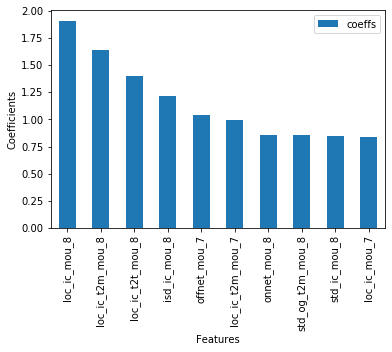

In [64]:
# Visualising coefficiets
result.sort_values(by='coeffs',ascending=False).head(10).set_index('Features').plot.bar()
plt.ylabel('Coefficients')
plt.show()

In [65]:
# Predicting on train
y_train_pred = final_model.predict(x_train)
y_train_pred[:10]

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 1], dtype=int64)

In [66]:
# Creating dataframe for Actual Churn, Churn Prob and mobile number
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'predicted':y_train_pred, 'mobile_number':x_train_mobile})
y_train_pred_final.head()

,Churn,predicted,mobile_number
10004,0,0,7001086439
5357,0,1,7000708191
4020,0,0,7000893882
13502,1,1,7002338776
16206,0,0,7000409036


In [67]:
# Defining function for drawing roc curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

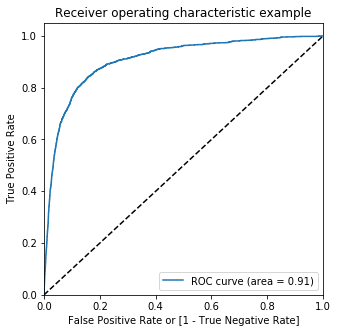

In [68]:
# Drawing ROC curve
draw_roc(y_train_pred_final.Churn, final_model.predict_proba(x_train)[:,1])

#####  Checking Test Accuracy and recall

In [69]:
# Predicting on train
y_test_pred = final_model.predict(x_test)
y_test_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [70]:
# Creating dataframe for Actual Churn, Churn Prob and mobile number
y_test_pred_final = pd.DataFrame({'Churn':y_test.values, 'predicted':y_test_pred, 'mobile_number':x_test_mobile})
y_test_pred_final.head()

,Churn,predicted,mobile_number
29767,0,0,7001236947
9742,0,0,7002161022
29811,0,0,7001137007
27675,0,0,7000596326
16242,0,0,7002054731


In [71]:
# Let's check the overall test accuracy and recall.
print("Test Accuracy : ", metrics.accuracy_score(y_test_pred_final.Churn, y_test_pred_final.predicted))
print("Test Recall : ", metrics.recall_score(y_test_pred_final.Churn, y_test_pred_final.predicted))
print("Test AUC: ", metrics.roc_auc_score(y_test_pred_final.Churn, y_test_pred_final.predicted))

Test Accuracy :  0.8316853682924119
Test Recall :  0.8092016238159675
Test AUC:  0.8214490326777732


# PCA

In [72]:
# Importing library for PCA
from sklearn.decomposition import PCA

In [73]:
# Instantiating PCA
pca = PCA(random_state=2)

In [74]:
pca.fit(x_train)

PCA(random_state=2)

### Components from the PCA

In [75]:
# Checking components of PCA
pca.components_

array([[-6.26467036e-02, -5.99404875e-02, -5.17796252e-02, ...,
        -1.43166504e-03,  2.36154516e-03,  1.66499473e-02],
       [ 1.55173345e-01,  1.64088523e-01,  1.66910634e-01, ...,
         3.17613807e-03, -1.66958687e-03, -1.63252592e-02],
       [ 1.01520716e-01,  1.22446662e-01,  1.05651549e-01, ...,
         2.24859470e-03, -8.99826313e-04, -8.69671289e-04],
       ...,
       [-0.00000000e+00,  3.65095520e-16, -1.07976956e-16, ...,
         5.98423582e-17, -2.77090621e-16,  3.90372636e-17],
       [ 0.00000000e+00,  2.39199761e-16,  2.23011799e-16, ...,
        -1.90908890e-18,  1.47294467e-16, -9.80422593e-17],
       [-0.00000000e+00,  2.11773544e-16, -6.99962055e-17, ...,
         2.25804903e-16,  1.55357699e-17,  1.58172359e-16]])

In [76]:
# Verifying variable explained by each component
pca.explained_variance_ratio_

array([1.26494833e-01, 1.07214746e-01, 7.59671168e-02, 5.10320762e-02,
       4.53141299e-02, 3.57989125e-02, 2.91961720e-02, 2.63369239e-02,
       2.41181637e-02, 2.27055649e-02, 2.15569016e-02, 2.07635519e-02,
       2.02600153e-02, 1.84893609e-02, 1.71404099e-02, 1.62983665e-02,
       1.52502144e-02, 1.46439523e-02, 1.41535374e-02, 1.40696692e-02,
       1.33392785e-02, 1.22950053e-02, 1.20383218e-02, 9.29432471e-03,
       8.96692426e-03, 8.64741222e-03, 8.54554740e-03, 8.05987614e-03,
       7.94183983e-03, 7.83681332e-03, 7.43934547e-03, 7.14368419e-03,
       7.05554320e-03, 6.75365389e-03, 6.57441986e-03, 6.33402550e-03,
       6.29396982e-03, 5.98624518e-03, 5.80730855e-03, 5.21782903e-03,
       5.05435561e-03, 4.39840119e-03, 4.26029118e-03, 4.18052405e-03,
       4.06034923e-03, 3.80902839e-03, 3.60411575e-03, 3.44108891e-03,
       3.29852906e-03, 3.21489060e-03, 3.18806824e-03, 3.10804059e-03,
       3.09430379e-03, 3.06300597e-03, 2.95271478e-03, 2.89602295e-03,
      

### Making a scree plot for the explained variance

In [77]:
# Creating cumulative variable
var_cumu = np.cumsum(pca.explained_variance_ratio_)

In [78]:
var_cumu

array([0.12649483, 0.23370958, 0.3096767 , 0.36070877, 0.4060229 ,
       0.44182181, 0.47101799, 0.49735491, 0.52147307, 0.54417864,
       0.56573554, 0.58649909, 0.60675911, 0.62524847, 0.64238888,
       0.65868724, 0.67393746, 0.68858141, 0.70273495, 0.71680462,
       0.7301439 , 0.7424389 , 0.75447722, 0.76377155, 0.77273847,
       0.78138588, 0.78993143, 0.79799131, 0.80593315, 0.81376996,
       0.82120931, 0.82835299, 0.83540853, 0.84216219, 0.84873661,
       0.85507063, 0.8613646 , 0.86735085, 0.87315816, 0.87837599,
       0.88343034, 0.88782874, 0.89208903, 0.89626956, 0.90032991,
       0.90413894, 0.90774305, 0.91118414, 0.91448267, 0.91769756,
       0.92088563, 0.92399367, 0.92708797, 0.93015098, 0.93310369,
       0.93599972, 0.93885179, 0.94164637, 0.9442566 , 0.94674925,
       0.94912852, 0.95149371, 0.95380512, 0.95609575, 0.95830187,
       0.96041733, 0.96242969, 0.96441284, 0.96632762, 0.968151  ,
       0.96993458, 0.97160138, 0.97323955, 0.97485254, 0.97643

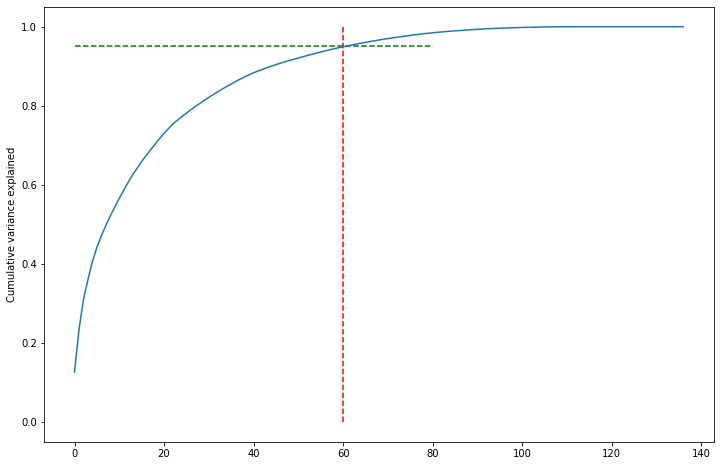

In [79]:
# Drawing scree plot
fig = plt.figure(figsize=[12,8])
plt.vlines(x=60, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=80, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

Perform PCA with 60 components

In [80]:
# Importing incrementalPCA library for memory efficient while doing PCA
from sklearn.decomposition import IncrementalPCA

In [81]:
# Instatiating the PCA
pca_final = IncrementalPCA(n_components=60)

In [82]:
# pca on train test
df_train_pca = pca_final.fit_transform(x_train)

In [83]:
df_train_pca.shape

(21000, 60)

In [84]:
# Creating correlation matrix to use the same for heatmap to verify independency of each components
corrmat = np.corrcoef(df_train_pca.transpose())

In [85]:
corrmat.shape

(60, 60)

In [86]:
# Creating pca for test data
df_test_pca = pca_final.transform(x_test)
df_test_pca.shape

(9001, 60)

## Logistic Regression with PCA

In [87]:
# Instantiating logistic regression with class_weight='balanced'
learner_pca = LogisticRegression(class_weight = 'balanced')

In [88]:
# Fitting the model with train pca 
model_pca = learner_pca.fit(df_train_pca, y_train)

In [89]:
# Predicting on train set pca data
y_train_pred_lg_pca = model_pca.predict(df_train_pca)
y_train_pred_lg_pca[0:10]

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 1], dtype=int64)

#### Making predictions on the train set

In [90]:
# Checking Accuracy and recall
print("Train Accuracy : ", metrics.accuracy_score(y_train, y_train_pred_lg_pca))
print("Train Recall : ", metrics.recall_score(y_train, y_train_pred_lg_pca))

Train Accuracy :  0.8146666666666667
Train Recall :  0.8319623971797885


In [91]:
# Creating dataframe for Actual Churn, Churn Prob and mobile number
y_train_pred_lg_pca = pd.DataFrame({'Churn':y_train.values, 'predicted':y_train_pred_lg_pca, 'mobile_number':x_train_mobile})
y_train_pred_lg_pca.head()

,Churn,predicted,mobile_number
10004,0,0,7001086439
5357,0,1,7000708191
4020,0,0,7000893882
13502,1,1,7002338776
16206,0,0,7000409036


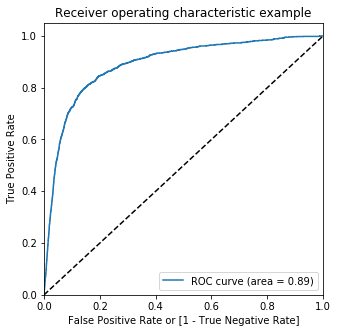

In [92]:
# Drwaing ROC curve
draw_roc(y_train_pred_lg_pca.Churn, model_pca.predict_proba(df_train_pca)[:,1])

#### Making predictions on the test set

In [93]:
y_test_pred_lg_pca = model_pca.predict(df_test_pca)
y_test_pred_lg_pca[0:10]

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [94]:
# Checking Accuracy and recall for test data
print("Test Accuracy : ", metrics.accuracy_score(y_test, y_test_pred_lg_pca))
print("Test Recall : ", metrics.recall_score(y_test, y_test_pred_lg_pca))
print("Test AUC: ", metrics.roc_auc_score(y_test, y_test_pred_lg_pca))

Test Accuracy :  0.8126874791689812
Test Recall :  0.8186738836265224
Test AUC:  0.8154129524644353


# Decision Trees with PCA

In [95]:
# Importing library for Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [96]:
# Instatiating Decision Tree with class_weight=balanced as data is not balanced
dt_base = DecisionTreeClassifier(class_weight='balanced',random_state=42, max_depth=4)

In [97]:
# Fitting the model
dt_model_pca = dt_base.fit(df_train_pca, y_train)

In [98]:
# Making prediction on train and test set
y_train_pred_dt = dt_base.predict(df_train_pca)
y_test_pred_dt = dt_base.predict(df_test_pca)

In [99]:
# Importing library for checking report of prediction
from sklearn.metrics import classification_report

In [100]:
# Checking precision, recall and f1 score on train
print(classification_report(y_train, y_train_pred_dt))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88     19298
           1       0.25      0.74      0.38      1702

    accuracy                           0.80     21000
   macro avg       0.61      0.77      0.63     21000
weighted avg       0.91      0.80      0.84     21000



In [101]:
# Checking precision, recall and f1 score on test
print(classification_report(y_test, y_test_pred_dt))

              precision    recall  f1-score   support

           0       0.97      0.80      0.88      8262
           1       0.25      0.74      0.37       739

    accuracy                           0.80      9001
   macro avg       0.61      0.77      0.62      9001
weighted avg       0.91      0.80      0.84      9001



## Plot the ROC curve

In [102]:
# Importing library for roc curve
from sklearn.metrics import plot_roc_curve

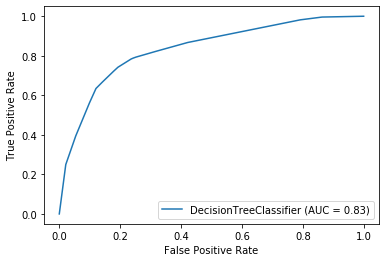

In [103]:
# Protting ROC curve
plot_roc_curve(dt_base, df_train_pca, y_train, drop_intermediate=False)
plt.show()

Here AUC score is not as good as in Logistic Regression

### Hyper-parameter tuning for the Decision Tree

In [104]:
# Import library for Grid Search
from sklearn.model_selection import GridSearchCV

In [105]:
# Instacing the DecisionTreeClassifier with class_weight='balanced' to balace the data
dt = DecisionTreeClassifier(class_weight='balanced',random_state=42)

In [106]:
# Initialising parameters with different max_depth and min_leaf_size 
params = {
    "max_depth": [2,3,5,10,20],
    "min_samples_leaf": [5,10,20,50,100,500]
}

In [107]:
# Setting parameters for Grid Search CV
grid_search_dt = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [108]:
%%time
grid_search_dt.fit(df_train_pca, y_train)

Fitting 4 folds for each of 30 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  2.2min finished


Wall time: 2min 12s


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 500]},
             scoring='accuracy', verbose=1)

In [109]:
# Showing the best score
grid_search_dt.best_score_

0.8521428571428572

In [110]:
# Best estimator parameters
dt_best = grid_search_dt.best_estimator_
dt_best

DecisionTreeClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=5, random_state=42)

In [111]:
# Preting test on tuned random forest
y_train_pred_pca_dt_cv = dt_best.predict(df_train_pca)
y_train_pred_pca_dt_cv[0:10]

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [112]:
# Checking Accuracy and recall on tuned random forest
print("Accuracy : ", metrics.accuracy_score(y_train, y_train_pred_pca_dt_cv))
print("Recall : ", metrics.recall_score(y_train, y_train_pred_pca_dt_cv))

Accuracy :  0.9419047619047619
Recall :  1.0


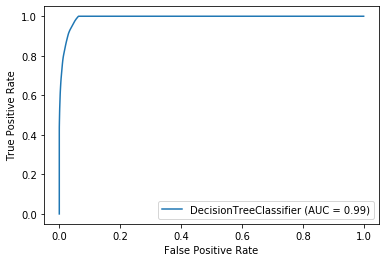

In [113]:
# Drawing the roc curve
plot_roc_curve(dt_best, df_train_pca, y_train)
plt.show()

Tuned auc score for decision tree is too good. It is better than logistic regression and un-tuned decision tree

#### Making predictions on the test set

In [114]:
# Preting test on tuned random forest
y_test_pred_pca_dt_cv = dt_best.predict(df_test_pca)
y_test_pred_pca_dt_cv[0:10]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [115]:
# Checking Accuracy and recall on tuned random forest
print("Accuracy : ", metrics.accuracy_score(y_test, y_test_pred_pca_dt_cv))
print("Recall : ", metrics.recall_score(y_test, y_test_pred_pca_dt_cv))

Accuracy :  0.8512387512498611
Recall :  0.4722598105548038


## Random Forest with PCA

In [116]:
# Importing library for Random forest model
from sklearn.ensemble import RandomForestClassifier

In [117]:
# Instancing RandomForestClassifier with class_weight='balanced'
rf = RandomForestClassifier(class_weight='balanced',n_estimators=10, max_depth=4, max_features=5, random_state=100, oob_score=True)

In [118]:
%%time
rf.fit(df_train_pca, y_train)

Wall time: 670 ms


RandomForestClassifier(class_weight='balanced', max_depth=4, max_features=5,
                       n_estimators=10, oob_score=True, random_state=100)

In [119]:
# Fitting the model
rf_model_pca = rf.fit(df_train_pca, y_train)

In [120]:
# Making prediction on train and test set
y_train_pred_rf = rf_model_pca.predict(df_train_pca)
y_test_pred_rf = rf_model_pca.predict(df_test_pca)

In [121]:
# Checking precision, recall and f1 score on train
print(classification_report(y_train, y_train_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.82      0.89     19298
           1       0.27      0.75      0.40      1702

    accuracy                           0.81     21000
   macro avg       0.62      0.79      0.64     21000
weighted avg       0.92      0.81      0.85     21000



In [122]:
# Checking precision, recall and f1 score
print(classification_report(y_test, y_test_pred_rf))

              precision    recall  f1-score   support

           0       0.97      0.81      0.88      8262
           1       0.25      0.72      0.37       739

    accuracy                           0.80      9001
   macro avg       0.61      0.76      0.63      9001
weighted avg       0.91      0.80      0.84      9001



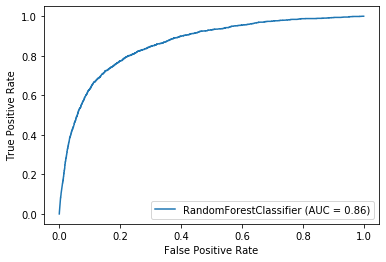

In [123]:
# Plotting the ROC curve
plot_roc_curve(rf, df_train_pca, y_train)
plt.show()

## Hyper-parameter tuning for the Random Forest

In [124]:
rf = RandomForestClassifier(class_weight='balanced',random_state=42, n_jobs=-1)

In [125]:
# Initialising parameters for grid search cv
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10, 25, 50, 100]
}

In [126]:
# Setting parameters for grid search
grid_search_rf = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [127]:
%%time
grid_search_rf.fit(df_train_pca, y_train)

Fitting 4 folds for each of 120 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 10.1min finished


Wall time: 10min 15s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 50, 100]},
             scoring='accuracy', verbose=1)

In [128]:
# Showing the best score
grid_search_rf.best_score_

0.9196190476190477

Random forest is giving best score of all the above models

In [129]:
# Combination of parameters of best estomator
rf_best = grid_search_rf.best_estimator_
rf_best

RandomForestClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=5, n_jobs=-1, random_state=42)

In [130]:
# Making prediction on train and test set
y_train_pred_rf_cv = rf_best.predict(df_train_pca)
y_test_pred_rf_cv = rf_best.predict(df_test_pca)

In [131]:
# Checking precision, recall and f1 score on train
print(classification_report(y_train, y_train_pred_rf_cv))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     19298
           1       0.85      0.99      0.91      1702

    accuracy                           0.98     21000
   macro avg       0.92      0.99      0.95     21000
weighted avg       0.99      0.98      0.99     21000



In [132]:
# Checking precision, recall and f1 score on test
print(classification_report(y_test, y_test_pred_rf_cv))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      8262
           1       0.54      0.40      0.46       739

    accuracy                           0.92      9001
   macro avg       0.74      0.68      0.71      9001
weighted avg       0.91      0.92      0.92      9001



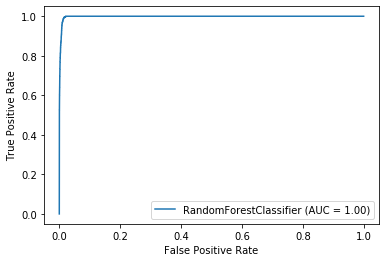

In [133]:
# Plotting the ROC curve
plot_roc_curve(rf_best, df_train_pca, y_train)
plt.show()

# Conclusions and recommendations for identifying churning customers

These features play important roles in indetifying customers who will churn in near futures
- loc_ic_mou_8
- loc_ic_t2m_mou_8
- loc_ic_t2t_mou_8
- isd_ic_mou_8	
- offnet_mou_7	
- loc_ic_t2m_mou_7
- onnet_mou_8		
- std_og_t2m_mou_8
- std_ic_mou_8	
- loc_ic_mou_7	


We have created Logistic Regression, Decision Tree and Random Forest models. From business prespective, Recall and  Accuracy metrics are important.

- Logistic Regression without PCA -  (Train Accuracy: 0.84, Train Recall: 0.85, Test Accuracy: 0.81, Test Recall: 0.81)
- Logistic Regression with PCA -  (Train Accuracy: 0.81, Train Recall: 0.83, Test Accuracy: 0.81, Test Recall: 0.82)
- Decision Tree with PCA -(Train Accuracy: 0.80, Train Recall: 0.74, Test Accuracy: 0.80, Test Recall: 0.74)
- Random Forest with PCA - (Train Accuracy: 0.81, Train Recall: 0.75, Test Accuracy: 0.80, Test Recall: 0.72)


By analysing models built we see that Logistic Regression Model give good accuracy and recall. So we reccomend Logistic Regression for final prediction for telecom churn cutomers.